#FAREMOS

Entender as cidades que mais possuem quilômetros rodados

Entender as cidades com as médias maiores (ou a maior)

Entender as cidades com as máximas maiores (ou a maior)

Entender as cidades com as minimas menores (ou a maior)

Verificar qual cidade tem mais registros e analisá-los

Analisar a média, máximo e mínimo desta cidade

Analisar pelo campo que descreve as bikes

Analisar se as bikes na maioria são de primeiro, segundo donos

Gerando gráficos sobre os dados


In [1]:
!pip install spark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58748 sha256=e9034c5f22f7a1705d5b440f0715e1398f5f1295f2c75a2a7c43b2455c38412b
  Stored in directory: /root/.cache/pip/wheels/6f/db/e2/945dc8c17477cf9ab56d9f9aa1fa75b75335fffff9b12d867d
Successfully built spark


In [3]:
from pyspark.sql import SparkSession
SparkSession = SparkSession.builder.appName("Bikes").getOrCreate()

In [7]:
bikes = SparkSession.read.option("header","true").csv("Bikes.csv")

In [14]:
bikes.createOrReplaceTempView("tab_bikes")
SparkSession.sql("select * from tab_bikes").show()



+--------------------+--------+---------+----------+------------+---+-----+-------------+
|           bike_name|   price|     city|kms_driven|       owner|age|power|        brand|
+--------------------+--------+---------+----------+------------+---+-----+-------------+
|TVS Star City Plu...| 35000.0|Ahmedabad|   17654.0| First Owner|3.0|110.0|          TVS|
|Royal Enfield Cla...|119900.0|    Delhi|   11000.0| First Owner|4.0|350.0|Royal Enfield|
|Triumph Daytona 675R|600000.0|    Delhi|     110.0| First Owner|8.0|675.0|      Triumph|
|TVS Apache RTR 180cc| 65000.0|Bangalore|   16329.0| First Owner|4.0|180.0|          TVS|
|Yamaha FZ S V 2.0...| 80000.0|Bangalore|   10000.0| First Owner|3.0|150.0|       Yamaha|
|    Yamaha FZs 150cc| 53499.0|    Delhi|   25000.0| First Owner|6.0|150.0|       Yamaha|
|Honda CB Hornet 1...| 85000.0|    Delhi|    8200.0| First Owner|3.0|160.0|        Honda|
|Hero Splendor Plu...| 45000.0|    Delhi|   12645.0| First Owner|3.0|100.0|         Hero|
|Royal Enf

In [18]:
SparkSession.sql("select city, avg(kms_driven)as media_Km from tab_bikes group by city order by media_km desc" ).show()

+------------------+------------------+
|              city|          media_Km|
+------------------+------------------+
|     Muzaffarnagar|          403833.0|
|           Vidisha|          172082.0|
|            Ranoli|          135000.0|
|           Navsari|          111224.0|
|         Osmanabad|           80000.0|
|         Kartarpur|           75000.0|
|             Latur|           71000.0|
|          Motihari|           69000.0|
|         Gangaghat|           65000.0|
|             Hisar|           65000.0|
|         Darbhanga|           61331.5|
|           Jaunpur|           61000.0|
|            Jaipur| 60106.93346573982|
|       Chikamaglur|           60000.0|
|           Raiwala|           60000.0|
|             Morbi|           60000.0|
|             Nabha|           59154.0|
|Thiruvananthapuram|58166.666666666664|
|             Rasra|           58000.0|
|              Bhuj|           54400.0|
+------------------+------------------+
only showing top 20 rows



In [22]:
SparkSession.sql("select city, max(kms_driven) as maximo_km from tab_bikes group by city order by maximo_km desc").show(1)

+-----+---------+
| city|maximo_km|
+-----+---------+
|Anand|  99999.0|
+-----+---------+
only showing top 1 row



In [23]:
SparkSession.sql("select city, min(kms_driven) as minimo_km from tab_bikes group by city order by minimo_km asc").show(1)

+------+---------+
|  city|minimo_km|
+------+---------+
|Nashik|      1.0|
+------+---------+
only showing top 1 row



In [25]:
SparkSession.sql("select brand, avg(power) as media_potencia, count(*) as total from tab_bikes group by brand order by total desc").show()

+---------------+------------------+-----+
|          brand|    media_potencia|total|
+---------------+------------------+-----+
|          Bajaj|196.31454561669491|11213|
|           Hero|116.17996231155779| 6368|
|  Royal Enfield| 366.1045955002393| 4178|
|         Yamaha|169.35010214504595| 3916|
|          Honda|152.67314990512335| 2108|
|         Suzuki| 138.2445355191257| 1464|
|            TVS| 170.9943865276664| 1247|
|            KTM| 346.7595171773445| 1077|
|Harley-Davidson| 758.2048846675713|  737|
|       Kawasaki| 570.8860759493671|   79|
|        Hyosung|             400.0|   64|
|        Benelli| 380.2857142857143|   56|
|       Mahindra| 192.9090909090909|   55|
|        Triumph| 893.0769230769231|   26|
|         Ducati|1016.1363636363636|   22|
|            BMW|            463.75|   16|
|           Jawa|             295.0|   10|
|             MV|             872.5|    4|
|         Indian|1353.3333333333333|    3|
|          Ideal|             250.0|    2|
+----------

In [26]:
bajaj = SparkSession.sql("select * from tab_bikes where brand = 'Bajaj'")

In [27]:
bajaj.createOrReplaceTempView("tab_bikes2")

In [28]:
type(bajaj)

pyspark.sql.dataframe.DataFrame

In [29]:
SparkSession.sql("select count(*) from tab_bikes2").show()

+--------+
|count(1)|
+--------+
|   11213|
+--------+



In [39]:
SparkSession.sql("select bike_name, avg(kms_driven) as media, max(kms_driven) as maximo, min(kms_driven) as minimo from tab_bikes group by bike_name order by 1 asc").show(70)

+--------------------+------------------+-------+--------+
|           bike_name|             media| maximo|  minimo|
+--------------------+------------------+-------+--------+
|   BMW F750 GS 850cc|            4600.0| 4600.0|  4600.0|
|        BMW G 310 GS|11068.333333333334| 4241.0| 14482.0|
|         BMW G 310 R| 8314.444444444445| 8500.0| 11000.0|
|   BMW S 1000 RR Pro|            2600.0| 2600.0|  2600.0|
|   BMW S 1000 XR Pro|           18000.0|18000.0| 18000.0|
| Bajaj  Pulsar 180cc|           44815.6|90393.0| 14524.0|
| Bajaj Avenger 150cc|           20850.0|20850.0| 20850.0|
| Bajaj Avenger 180cc|           30312.0|30312.0| 30312.0|
| Bajaj Avenger 200cc|35448.555555555555|62554.0| 24500.0|
| Bajaj Avenger 220cc| 35184.07330097087| 9370.0| 10000.0|
|Bajaj Avenger Cru...|15913.819444444445| 9900.0| 10000.0|
|Bajaj Avenger Cru...|            1958.0| 1958.0|  1958.0|
|Bajaj Avenger Str...|19172.886666666665| 9600.0| 10000.0|
|Bajaj Avenger Str...|           5052.25| 7000.0|  2700.

In [40]:
SparkSession.sql("select owner,count(*) as total from tab_bikes group by owner order by 2 desc").show()

+--------------------+-----+
|               owner|total|
+--------------------+-----+
|         First Owner|29964|
|        Second Owner| 2564|
|         Third Owner|  108|
|Fourth Owner Or More|   12|
+--------------------+-----+



In [41]:
bajaj_df = SparkSession.sql("select owner, count(*) as total from tab_bikes group by owner order by 2 desc")
bajaj_pandas = bajaj_df.toPandas()

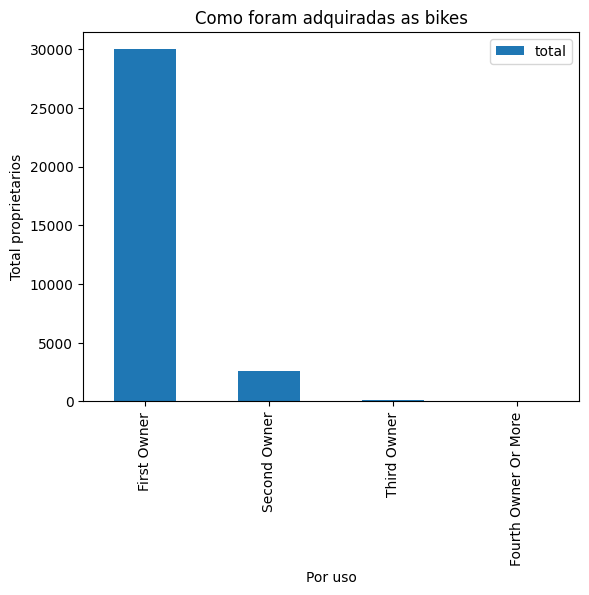

In [44]:
import matplotlib.pyplot as plotar
bajaj_pandas.plot(kind = 'bar', x = 'owner', y = 'total')
plotar.title('Como foram adquiradas as bikes')
plotar.xlabel('Por uso')
plotar.ylabel('Total proprietarios')
plotar.show()